In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Importing modules

In [ ]:
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading data

In [ ]:
data=pd.read_csv("/kaggle/input/cardiovascular-disease-dataset/cardio_train.csv",sep=";",index_col=0)

In [ ]:
data=pd.DataFrame(data)

# Oerview of data

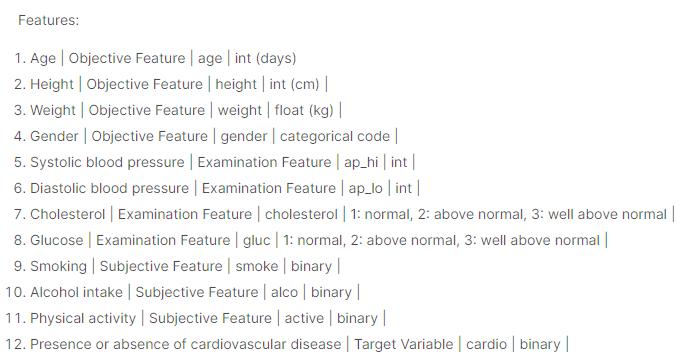

In [ ]:
data.head()

In [ ]:
data.describe()

### Overview of datatypes of the attributes

In [ ]:
data.dtypes

### Checking if data has some missing values

In [ ]:
data.isnull().sum()

### Distribution of data based on class labels

In [ ]:
data['cardio'].value_counts()

### Distribution based on gender

In [ ]:
print("Total females = ",data[data['gender']==1].shape[0])
print("Total males = ",data[data['gender']==2].shape[0])

In [ ]:
females_without_cardiovascular=np.logical_and(data['gender']==1,data['cardio']==0).sum()
print("females not having cardiovascular disease = ",females_without_cardiovascular)
females_with_cardiovascular=np.logical_and(data['gender']==1,data['cardio']==1).sum()
print("females having cardiovascular disease = ",females_with_cardiovascular)
males_without_cardiovascular=np.logical_and(data['gender']==2,data['cardio']==0).sum()
print("Males not having cardiovascular disease = ",males_without_cardiovascular)
males_with_cardiovascular=np.logical_and(data['gender']==2,data['cardio']==1).sum()
print("Males having cardiovascular disease = ",males_with_cardiovascular)

### Distribution based on if a person smokes or not

In [ ]:
print("Number of people who smoke = ",data[data['smoke']==1].shape[0])
print("Number of people who don't smoke = ",data[data['smoke']==0].shape[0])

In [ ]:
Smokers_without_cardiovascular=np.logical_and(data['smoke']==1,data['cardio']==0).sum()
print("Smokers not having cardiovascular disease = ",Smokers_without_cardiovascular)
Smokers_with_cardiovascular=np.logical_and(data['smoke']==1,data['cardio']==1).sum()
print("Smokers having cardiovascular disease = ",Smokers_with_cardiovascular)
Non_Smokers_without_cardiovascular=np.logical_and(data['smoke']==0,data['cardio']==0).sum()
print("Non Smokers not having cardiovascular disease = ",Non_Smokers_without_cardiovascular)
Non_Smokers_with_cardiovascular=np.logical_and(data['smoke']==0,data['cardio']==1).sum()
print("Non Smokers having cardiovascular disease = ",Non_Smokers_with_cardiovascular)

### Distribution based on if person consumes alcohol or not

In [ ]:
print("Number of people who consume alcohol = ",data[data['alco']==1].shape[0])
print("Number of people who don't consume alcohol = ",data[data['alco']==0].shape[0])

In [ ]:
ac_without_cardiovascular=np.logical_and(data['alco']==1,data['cardio']==0).sum()
print("Alcohol consumer not having cardiovascular disease = ",ac_without_cardiovascular)
ac_with_cardiovascular=np.logical_and(data['alco']==1,data['cardio']==1).sum()
print("Alcohol consumer having cardiovascular disease = ",ac_with_cardiovascular)
nac_without_cardiovascular=np.logical_and(data['alco']==0,data['cardio']==0).sum()
print("Non alcohol consumer not having cardiovascular disease = ",nac_without_cardiovascular)
nac_with_cardiovascular=np.logical_and(data['alco']==0,data['cardio']==1).sum()
print("Non alcohol consumer having cardiovascular disease = ",nac_with_cardiovascular)

# Data Preprocessing

## Checking if Diastolic pressure is higher than Systolic pressure

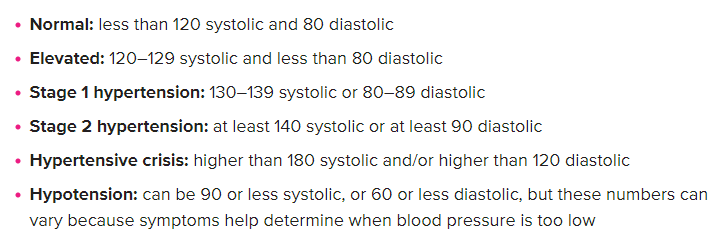

In [ ]:
print("Diastilic pressure is higher than systolic one in {0} cases".format(data[data['ap_lo']> data['ap_hi']].shape[0]))

## Dropping those rows which have diastolic pressure greater than Systolic pressure

In [ ]:
data.drop(data[data['ap_lo']>data['ap_hi']].index,inplace=True)

In [ ]:
data.shape

## Checking if all values in age are positive

In [ ]:
print("Number of negative values of age = ",data[data['age']<0].shape[0])

## Checking if height and weight is positive in all cases

In [ ]:
print("cases with negative height = ",data[data['height']<0].shape[0])
print("cases with negative weight = ",data[data['weight']<0].shape[0])

## Age is given in number of days we need to convert it in number of years

In [ ]:
data['years_old']=(data['age']/365).round().astype('int')

In [ ]:
data.head()

### Dropping age attribute

In [ ]:
data=data.drop(columns=['age'])
data.head()

## List of algorithms
1. Decision Tree
2. Random Forest
3. SVM(Using regressor)
4. Ensemble methods

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
X=data[['gender','height','years_old','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active']]
Y=data[['cardio']]

In [ ]:
X.head()

In [ ]:
Y.head()

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [ ]:
print("Training data shape (X) = ",X_train.shape,"training data shape (Y) = ",Y_train.shape)

In [ ]:
print("Test data shape (X) = ",X_test.shape,"Test data shape (Y) = ",Y_test.shape)

## Random Forest Regressor

In [ ]:
RFRmodel=RandomForestRegressor(min_samples_split=8,max_depth=14) #default criterion msr


In [ ]:
RFRmodel.fit(X_train,Y_train)

In [ ]:
RFRmodel.predict([[2,168,50,62.0,110,80,1,1,0,0,1]])

In [ ]:
Y_test_pred=RFRmodel.predict(X_test)
Y_train_pred=RFRmodel.predict(X_train)

In [ ]:
print("Mean Squared Error on train set =",mean_squared_error(Y_train,Y_train_pred))

In [ ]:
print("Mean Squared Error on test set =",mean_squared_error(Y_test,Y_test_pred))

In [ ]:
import pickle

In [ ]:
with open('RFRmodel','wb') as f:
    pickle.dump(RFRmodel,f)